# Problem Statement.
- Handwritten Digits recognizer.
- Train dataset consists of 42k rows with 785 cols.
- Test dataset consists of 28k rows with 784 cols.
- hello world competition of Computer Vision. 

# Steps:
1. Import libraries.
2. Get data into pandas dataframe
    - 2.1 drop label from train dataset.
3. Pre-processing
    - 3.1 Normalize data for better performance (Convert pixels values from [0:255] to [0:1])
    - 3.2 Reshape data for keras convention (sample size,width,height,color) -- syntax
    - 3.3 convert labels into one-hot-encode and also view OHE labels for understanding.
    
4. Visualize data with matplotlib
5. Split train data for validation.
6. Build model CNN using keras
   - 6.1 Set parameters and stack layers
   - 6.2 Get summary.
   - 6.3 Define loss function and metrics 
   - 6.4 Train model with parameters.
   - 6.5 Set callbacks to monitor val_acc and for Learning rate to stop when there won't increases in val_accuracy.
7. Predict and submit.

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


# 1. Import Libraries

In [2]:
import keras # Neural nets API
import numpy as np # Linear algebra
import pandas as pd # Data manipulation.

Using TensorFlow backend.


In [3]:
# Load data into train and test pandas dataframe
train_df=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_df=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [4]:
# view top 5 rows. 
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Label variable states the digit of each col

In [5]:
test_df.head() # view top 5 rows of test data.

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- No label we need to predict .

In [6]:
# shape of both train and test dataset.
train_df.shape ,test_df.shape

((42000, 785), (28000, 784))

In [7]:
# drop target (label) into new one
target=train_df["label"]
train_df.drop("label",axis=1,inplace=True)

In [8]:
train_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Label dropped

# 2. Normalize and Reshape data to visualize images format.

In [9]:
train_df=train_df/255 # normalize will work better with cnn
test_df=test_df/255 # from [0:255] to [0:1]

In [10]:
X_train=train_df.values.reshape(-1,28,28,1) # reshaping to keras convention (sample,height,width,color)
test=test_df.values.reshape(-1,28,28,1)

In [11]:
from keras.utils.np_utils import to_categorical
y_train=to_categorical(target,num_classes=10) # one hot encoding

In [12]:
y_train[0] # view first label after OHE.

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# 3. visualize by reshaping data.

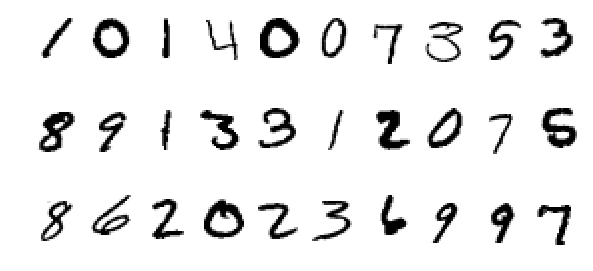

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

for i in range(30):
    plt.subplot(3,10,i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis("off")
plt.subplots_adjust(wspace=0,hspace=0)
plt.show()

# 4. Split train data for validation

In [14]:
# train test split data one for training one for vaildation.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.10,random_state=42)

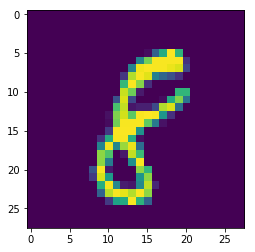

In [15]:
plt.imshow(X_train[0].reshape((28,28))) # plot

In [16]:
y_train[0] # result for above plot.

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

# 5. Model building.


### Network Parameters:

> - Batch Size - Number of rows from the input data to use it one iteratation from the training purpose  
> - Num Classes - Total number of possible classes in the target variable  
> - Epochs - Total number of iterations for which cnn model will run.

In [17]:
batch_size=128
num_classes=10
epochs=20
inputshape=(28,28,1)

In [18]:
from keras.models import Sequential # import sequential convention so we can add layer after other.
import keras
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten,BatchNormalization
model=Sequential()

# add first convolutional layer.
model.add(Conv2D(32,kernel_size=(5,5),activation="relu",input_shape=inputshape))
# add second convolutional layer
model.add(Conv2D(64,(3,3),activation="relu"))
          
# add maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(5,5),activation="relu"))
# add second convolutional layer
model.add(Conv2D(128,(3,3),activation="relu"))

# add one drop layer
model.add(Dropout(0.25))

# add flatten layer
model.add(Flatten())

# add dense layer
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
          
# add another dropout layer
model.add(Dropout(0.5))

# add dense layer
model.add(Dense(num_classes, activation='softmax'))

In [19]:
# complile the model and view its architecture
model.compile(loss="categorical_crossentropy",  optimizer="Adam", metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 128)         147584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)             

In [20]:
# callbacks
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping
reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 3, verbose = 1, factor = 0.3, min_lr = 0.00001)
checkpoint = ModelCheckpoint('save_weights.h5', monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 1e-10, patience = 10, verbose = 1, restore_best_weights = True)

callbacks = [reduce_learning_rate, checkpoint, early_stopping]

In [21]:
# train model
model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,y_test),callbacks=callbacks)
accuracy=model.evaluate(X_test,y_test)

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 7s 185us/step - loss: 0.2989 - accuracy: 0.9079 - val_loss: 0.0661 - val_accuracy: 0.9810

Epoch 00001: val_accuracy improved from -inf to 0.98095, saving model to save_weights.h5
Epoch 2/20
37800/37800 [==============================] - 3s 74us/step - loss: 0.0765 - accuracy: 0.9789 - val_loss: 0.0464 - val_accuracy: 0.9871

Epoch 00002: val_accuracy improved from 0.98095 to 0.98714, saving model to save_weights.h5
Epoch 3/20
37800/37800 [==============================] - 3s 75us/step - loss: 0.0517 - accuracy: 0.9859 - val_loss: 0.0712 - val_accuracy: 0.9786

Epoch 00003: val_accuracy did not improve from 0.98714
Epoch 4/20
37800/37800 [==============================] - 3s 75us/step - loss: 0.0406 - accuracy: 0.9882 - val_loss: 0.0413 - val_accuracy: 0.9888

Epoch 00004: val_accuracy improved from 0.98714 to 0.98881, saving model to save_weights.h5
Epoch 5/20
37800/37800 [======

In [22]:
pred = model.predict_classes(test)
res = pd.DataFrame({"ImageId":list(range(1,28001)),"Label":pred})
res.to_csv("output.csv", index = False)